# Metacritic Review Data

We use this layout for embedding (apart from I am using the 4th Universal Sentence Encoder, rather than 3rd) and our neural network: https://www.curiousily.com/posts/sentiment-analysis-with-tensorflow-2-and-keras-using-python/ - the work of 
Venelin Valkov. I am also doing this for three category classification rather than 2. 

Import relevant packages

In [ ]:
!pip install tensorflow_text

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow_hub as hub
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import tensorflow_hub as hub
import tensorflow_text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder



RANDOM_STATE = 38

np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

     |████████████████████████████████| 2.6MB 2.8MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Put all of the csv's of Metacritic games together for training:

In [ ]:
df1 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/TLOU2_reviews.csv",engine='python')
df2 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/RDR2_reviews.csv",engine='python')
df3 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/pokemon_reviews.csv",engine='python')
df4 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/overwatch_reviews.csv",engine='python')
df5 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/MW_reviews.csv",engine='python')
df6 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/minecraft_reviews.csv",engine='python')
df7 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/DS_reviews.csv",engine='python')
df8 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/battlefront_reviews.csv",engine='python')
df9 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/BO3_reviews.csv",engine='python' )
df10 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/ASO_reviews.csv",engine='python' )
df11 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/NMS_reviews.csv",engine='python' )
df12 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/HALO5_reviews.csv",engine='python' )
df13 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/BL3_reviews.csv",engine='python' )
df14 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/ACOR_reviews.csv",engine='python' )
df15 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/1886_reviews.csv",engine='python' )
df16 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/DG_reviews.csv",engine='python' )
df17 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/GTAV_reviews.csv",engine='python' )
df18 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/AK_reviews.csv",engine='python' )
df19 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/ACNH_reviews.csv",engine='python' )
df20 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/LG_reviews.csv",engine='python' )
df21 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/RE3_reviews.csv",engine='python' )
df22 = pd.read_csv("drive/My Drive/csv's/MetacriticDataset/GOW4_reviews.csv",engine='python' )
df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22])
df = df.reset_index(drop=True)
df = df.dropna()

print(df)

       rating                                             review
0         2.0  Technical part is amazing! Shadows, light awes...
1         2.0  Somewhere in this mess was potential for a gre...
2         4.0  i was so hyped for this game 20 and something ...
3         0.0  I do not think, a very dead Joel does not make...
4         0.0  What is this garbage. There is no game in ther...
...       ...                                                ...
72407    10.0  Excellent game, a twist, graphic Bueb and hist...
72408     9.0  Good game however does not fill a small void t...
72409     8.0  Much like what Halo 4 was to the original tril...
72410     9.0  The game has a great story! With stunning grap...
72411     7.0  another gears game. A 9 for visuals, 6 for sto...

[67282 rows x 2 columns]


# Preprocessing

The reviews are then seperated into 3 classes that will be compared against the predictions for the 3 class classification. These 3 classes are based off the Metacritic website. I have collected enough reviews now so that there will be at least 15,000 values to train on (if positive, negative and average have the same length). 

In [ ]:
df['review_type'] = df['rating']
df.loc[df['review_type'] == 0.0, 'review_type'] = "Negative"
df.loc[df['review_type'] == 1.0, 'review_type'] = "Negative"
df.loc[df['review_type'] == 2.0, 'review_type'] = "Negative"
df.loc[df['review_type'] == 3.0, 'review_type'] = "Negative"
df.loc[df['review_type'] == 4.0, 'review_type'] = "Negative"
df.loc[df['review_type'] == 5.0, 'review_type'] = "Average"
df.loc[df['review_type'] == 6.0, 'review_type'] = "Average"
df.loc[df['review_type'] == 7.0, 'review_type'] = "Average"
df.loc[df['review_type'] == 8.0, 'review_type'] = "Positive"
df.loc[df['review_type'] == 9.0, 'review_type'] = "Positive"
df.loc[df['review_type'] == 10.0, 'review_type'] = "Positive"

print(df['review_type'].value_counts())
print(df['rating'].value_counts())

Positive    35105
Negative    26887
Average      5290
Name: review_type, dtype: int64
10.0    24543
0.0     14609
9.0      6689
1.0      4610
8.0      3873
2.0      2775
4.0      2449
3.0      2444
5.0      1881
7.0      1862
6.0      1547
Name: rating, dtype: int64


Notice that we have the least amount of average reviews, so we want all review types to be of equal length:

In [ ]:
negative_reviews = df[df.review_type == "Negative"]
average_reviews = df[df.review_type == "Average"]
positive_reviews = df[df.review_type == "Positive"]

print(negative_reviews.shape)
print(average_reviews.shape)
print(positive_reviews.shape)



(26887, 3)
(5290, 3)
(35105, 3)


Now there are the same number of reviews in each category:

In [ ]:
negative_df = negative_reviews.sample(n=len(average_reviews), random_state=RANDOM_STATE)
average_df = average_reviews
positive_df = positive_reviews.sample(n=len(average_reviews), random_state=RANDOM_STATE)
review_df = negative_df.append(average_df).append(positive_df)
print(negative_df.shape)
print(average_df.shape)
print(positive_df.shape)
review_df = review_df.reset_index(drop=True)
print(review_df)

(5290, 3)
(5290, 3)
(5290, 3)
       rating                                             review review_type
0         0.0  It’s a shame the game went that direction.Joel...    Negative
1         0.0  The game is nice but you cant get all pokemon ...    Negative
2         0.0  C p'o BO pr ctre Tum Nuk c m kar best bread of...    Negative
3         3.0  This is what you get if you priorities graphic...    Negative
4         0.0  Just a modern propaganda when brawe patriotic ...    Negative
...       ...                                                ...         ...
15865    10.0  Great game, with new techniques and different ...    Positive
15866    10.0  You can't expect fans or anyone else to enjoy ...    Positive
15867    10.0  Atmosphere, story, gameplay and totally new an...    Positive
15868    10.0  Just finished playing and woah. So emotional, ...    Positive
15869     9.0  Visuals are stunning, the gameplay is the same...    Positive

[15870 rows x 3 columns]


Load the Universal Sentence Encoder: Instead of doing lots of preprocessing, tokenizing etc, thus we use the Universal Sentence Encoder to encode sentences into embedding vectors. This is basically a way of comparing sentences after converting them to a vector of 512 elements. 

In [ ]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

We one-hot encode the review types, i.e. puts 1 or 0 in place of positive, negative or average. 

In [ ]:
type_one_hot = OneHotEncoder(sparse=False).fit_transform(
  review_df.review_type.to_numpy().reshape(-1, 1)
)

Can see we have 15,870 elements and 3 elements per review. Can see that the first review is an average one

In [ ]:
print(type_one_hot.shape)
print(type_one_hot[0])

(15870, 3)
[0. 1. 0.]


Split the data into: train_reviews, test_reviews, y_train, y_test, so that embeddings can be created:

In [ ]:
train_reviews, test_reviews, y_train, y_test =\
  train_test_split(
    review_df.review, 
    type_one_hot, 
    test_size=.1, 
    random_state=RANDOM_STATE
  )

Create embeddings for X_train, note that this is for the 4th USE so need to use [ r ] rather than r:

In [ ]:
X_train = []
for r in tqdm(train_reviews):
  emb = use([r])
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(review_emb)

X_train = np.array(X_train)

100%|██████████| 14283/14283 [00:42<00:00, 333.86it/s]


Create Embeddings for X_test:

In [ ]:
X_test = []
for r in tqdm(test_reviews):
  emb = use([r])
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(review_emb)

X_test = np.array(X_test)

100%|██████████| 1587/1587 [00:04<00:00, 359.71it/s]


# Sentiment Analysis 



*   **Input layer:** Start with the fully connected layer, with 256 neurons, input shape is the same shape as X_train, i.e. 512. Use reLu activation function.  
*   **2nd layer:** Dropout layer (prevent overfitting)
*   **3rd layer:** Same as input layer, but with 128 neurons (half). 
*   **4th layer:** Dropout layer
*   **Output layer:** Outputs 3 neurons for negative, average and positive. Softmax activation as we are doing classification 
*   Use categorical crossentropy loss function 
*   Use a learning rate of 0.00001 as this leads to the best accuracy, the model differs here from the Amazon Model. 






In [ ]:
model = keras.Sequential()

model.add(
  keras.layers.Dense(
    units=256,
    input_shape=(X_train.shape[1], ), 
    activation='relu'
  )
)

model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(
  keras.layers.Dense(
    units=128,
    activation='relu'
  )
)

model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.Adam(0.00001),
    metrics=['accuracy']
)



model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 164,611
Trainable params: 164,611
Non-trainable params: 0
_________________________________________________________________


I decide to use earlystopping to try and get the best possible model, i.e. the val_loss is always decreasing regardless of accuracy increasing. I have used a slightly higher validation dataset than I usually would as there is a small dataset. The model eventually gets to around 82 epochs before the val_loss starts to increase. Uses a smaller batch size than the Amazon model as it leads to a better accuracy. The model achieves 69% accuracy on the training data, and 68% on the validation data. 



In [ ]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    X_train, y_train, 
    callbacks=[es_callback],
    epochs=1000, 
    batch_size=16, 
    validation_split=0.2, 
    verbose=1, 
    shuffle=True
)

Epoch 1/1000
715/715 [==============================] - 2s 3ms/step - loss: 1.0956 - accuracy: 0.3578 - val_loss: 1.0891 - val_accuracy: 0.3700
Epoch 2/1000
715/715 [==============================] - 2s 2ms/step - loss: 1.0861 - accuracy: 0.3998 - val_loss: 1.0785 - val_accuracy: 0.4732
Epoch 3/1000
715/715 [==============================] - 2s 2ms/step - loss: 1.0748 - accuracy: 0.4415 - val_loss: 1.0649 - val_accuracy: 0.5551
Epoch 4/1000
715/715 [==============================] - 2s 2ms/step - loss: 1.0609 - accuracy: 0.4925 - val_loss: 1.0475 - val_accuracy: 0.5908
Epoch 5/1000
715/715 [==============================] - 2s 2ms/step - loss: 1.0424 - accuracy: 0.5284 - val_loss: 1.0256 - val_accuracy: 0.6073
Epoch 6/1000
715/715 [==============================] - 2s 3ms/step - loss: 1.0239 - accuracy: 0.5526 - val_loss: 1.0019 - val_accuracy: 0.6139
Epoch 7/1000
715/715 [==============================] - 2s 2ms/step - loss: 1.0003 - accuracy: 0.5751 - val_loss: 0.9763 - val_accuracy:

Plots train loss and validation loss against the number of epochs. 

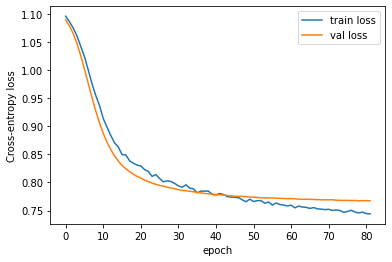

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend();

Plots train accuracy and validation accuracy against the number of epochs. 

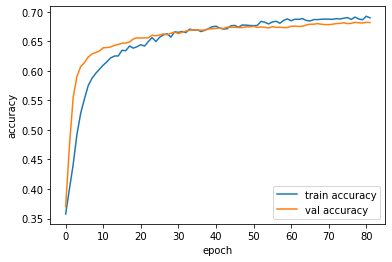

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();

The model achieves 68% accuracy on the testing data.

In [ ]:
model.evaluate(X_test, y_test)

50/50 [==============================] - 0s 1ms/step - loss: 0.7598 - accuracy: 0.6799


[0.7597514986991882, 0.6798991560935974]

In [ ]:
print(test_reviews.iloc[0])

Nothing common with war actions.


In [ ]:
print(y_test[0])

[0. 1. 0.]


62% sure this is an average review

In [ ]:
y_pred1 = model.predict(X_test[:1])
print(y_pred1)

[[0.16534738 0.61931247 0.21534017]]


Save the model 

In [ ]:
model.save("drive/My Drive/MetacriticModel.h5")